In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx 
import dash
import dash_core_components as dcc
import dash_html_components as html

from sklearn.manifold import MDS
from scipy.spatial import distance

In [2]:
x = pd.read_csv('taiwan-high-speed-rail.csv',encoding='utf-8')

In [3]:
x

,id,name,zipcode,address,lat,lon
0,1,台北站,10041,台北市中正區北平西路3號,25.047924,121.517081
1,2,桃園站,32056,桃園縣中壢市高鐵北路一段6號,25.013093,121.215217
2,3,新竹站,30273,新竹縣竹北市高鐵七路6號,24.808060,121.040415
3,4,台中站,41456,台中市烏日區站區二路8號,24.112143,120.616152
4,5,雲林站,63247,雲林縣虎尾鎮站前東路301號,23.733558,120.417303
5,6,台南站,71151,台南市歸仁區歸仁大道100號,22.924928,120.285720
6,7,左營站,81361,高雄市左營區高鐵路105號,22.686927,120.307827


In [4]:
title=x["name"].values

In [5]:
y=x[["lat","lon"]]

In [6]:
y

,lat,lon
0,25.047924,121.517081
1,25.013093,121.215217
2,24.808060,121.040415
3,24.112143,120.616152
4,23.733558,120.417303
5,22.924928,120.285720
6,22.686927,120.307827


In [7]:
dis_matrix1=distance.cdist(y, y, 'euclidean')

In [8]:
dis_matrix1

array([[0.        , 0.30386687, 0.53361523, 1.29898389, 1.71378849,
        2.45425384, 2.65265943],
       [0.30386687, 0.        , 0.26943324, 1.08193797, 1.5079382 ,
        2.28569415, 2.49687903],
       [0.53361523, 0.26943324, 0.        , 0.81504574, 1.24210465,
        2.0287313 , 2.24407896],
       [1.29898389, 1.08193797, 0.81504574, 0.        , 0.42763045,
        1.23234117, 1.4581855 ],
       [1.71378849, 1.5079382 , 1.24210465, 0.42763045, 0.        ,
        0.81926569, 1.05234078],
       [2.45425384, 2.28569415, 2.0287313 , 1.23234117, 0.81926569,
        0.        , 0.23902551],
       [2.65265943, 2.49687903, 2.24407896, 1.4581855 , 1.05234078,
        0.23902551, 0.        ]])

In [9]:
a=pd.DataFrame(dis_matrix1,title,title)

In [10]:
a

,台北站,桃園站,新竹站,台中站,雲林站,台南站,左營站
台北站,0.000000,0.303867,0.533615,1.298984,1.713788,2.454254,2.652659
桃園站,0.303867,0.000000,0.269433,1.081938,1.507938,2.285694,2.496879
新竹站,0.533615,0.269433,0.000000,0.815046,1.242105,2.028731,2.244079
台中站,1.298984,1.081938,0.815046,0.000000,0.427630,1.232341,1.458185
雲林站,1.713788,1.507938,1.242105,0.427630,0.000000,0.819266,1.052341
台南站,2.454254,2.285694,2.028731,1.232341,0.819266,0.000000,0.239026
左營站,2.652659,2.496879,2.244079,1.458185,1.052341,0.239026,0.000000


In [11]:
mds = MDS(n_components=2)
result = mds.fit_transform(a)

D:\anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_mds.py:441: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


In [12]:
result

array([[ 2.06349897, -1.34834867],
       [ 2.19070759, -0.73700107],
       [ 1.83269387, -0.26945774],
       [ 0.25645476,  1.0202888 ],
       [-0.75891706,  1.20341007],
       [-2.61320501,  0.24292336],
       [-2.97123312, -0.11181476]])

In [13]:
# for i in result:
#     i[1]=i[1]*-1

In [14]:
result

array([[ 2.06349897, -1.34834867],
       [ 2.19070759, -0.73700107],
       [ 1.83269387, -0.26945774],
       [ 0.25645476,  1.0202888 ],
       [-0.75891706,  1.20341007],
       [-2.61320501,  0.24292336],
       [-2.97123312, -0.11181476]])

In [15]:
L=['Taipei','Taoyuan','Hsinchu','Taichung','Yullin','Tainan','Kaohsiung']

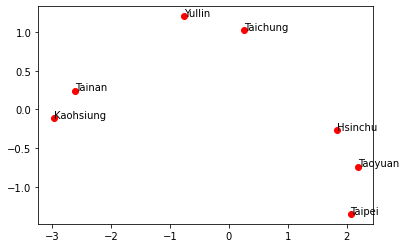

In [16]:
plt.scatter(result[0:,0],result[0:,1],color='red')

for i, label in enumerate(L):
    plt.annotate(label, (result[i,0], result[i,1]))

In [19]:
app = dash.Dash(__name__)

In [22]:
app.layout = html.Div([
    dcc.Graph(
        id='basic-interactions',
        figure={
            'data': [
                {
                    'x': [1, 2, 3, 4],
                    'y': [4, 1, 3, 5],
                    'text': ['a', 'b', 'c', 'd'],
                    'customdata': ['c.a', 'c.b', 'c.c', 'c.d'],
                    'name': 'Trace 1',
                    'mode': 'markers',
                    'marker': {'size': 12}
                },
                {
                    'x': [1, 2, 3, 4],
                    'y': [9, 4, 1, 4],
                    'text': ['w', 'x', 'y', 'z'],
                    'customdata': ['c.w', 'c.x', 'c.y', 'c.z'],
                    'name': 'Trace 2',
                    'mode': 'markers',
                    'marker': {'size': 12}
                }
            ]
        }
    ),

    html.Div([
        dcc.Markdown("""
            **Hover Data**

            Mouse over values in the graph.
        """.replace('   ', '')),
        html.Pre(id='hover-data')
    ], style=styles['column']),

    html.Div([
        dcc.Markdown("""
            **Click Data**

            Click on points in the graph.
        """.replace('    ', '')),
        html.Pre(id='click-data'),
    ], style=styles['column']),

    html.Div([
        dcc.Markdown("""
            **Selection Data**

            Choose the lasso or rectangle tool in the graph's menu
            bar and then select points in the graph.
        """.replace('    ', '')),
        html.Pre(id='selected-data'),
    ])
])

@app.callback(
    Output('hover-data', 'children'),
    [Input('basic-interactions', 'hoverData')])
def display_hover_data(hoverData):
    #
    # This is where you can access the hover data
    # This function will get called automatically when you hover over points
    # hoverData will be equal to an object with that data
    # You can compute something off of this data, and return it to the front-end UI
    # 


    return json.dumps(hoverData, indent=2)


@app.callback(
    Output('click-data', 'children'),
    [Input('basic-interactions', 'clickData')])
def display_click_data(clickData):
    # Similarly for data when you click on a point
    return json.dumps(clickData, indent=2)


@app.callback(
    Output('selected-data', 'children'),
    [Input('basic-interactions', 'selectedData')])
def display_selected_data(selectedData):
    # Similarly for data when you select a region
    return json.dumps(selectedData, indent=2)


if __name__ == '__main__':
    app.run_server(debug=True)

NameError: name 'styles' is not defined